In [1]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
#load dataset after preprocessing
dsa = pd.read_csv('d_sa_t.csv')

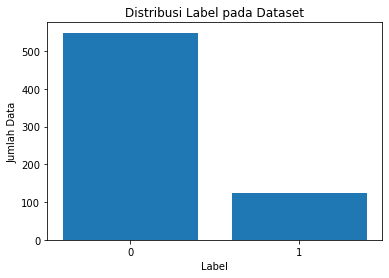

In [3]:
count_label = dsa['Kuliner'].value_counts()

# Membuat diagram batang
plt.bar(count_label.index, count_label.values)
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label pada Dataset')
plt.show()

Epoch 1/100
7/7 [==============================] - 7s 280ms/step - loss: 0.6646 - accuracy: 0.7309 - val_loss: 0.5859 - val_accuracy: 0.8426
Epoch 2/100
7/7 [==============================] - 0s 34ms/step - loss: 0.5116 - accuracy: 0.8074 - val_loss: 0.4149 - val_accuracy: 0.8426
Epoch 3/100
7/7 [==============================] - 0s 37ms/step - loss: 0.4608 - accuracy: 0.8074 - val_loss: 0.4167 - val_accuracy: 0.8426
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 0.4468 - accuracy: 0.8074 - val_loss: 0.4080 - val_accuracy: 0.8426
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 0.4356 - accuracy: 0.8074 - val_loss: 0.3864 - val_accuracy: 0.8426
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.4228 - accuracy: 0.8074 - val_loss: 0.3954 - val_accuracy: 0.8426
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 0.4049 - accuracy: 0.8074 - val_loss: 0.3597 - val_accuracy: 0.8426
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 34ms/step - loss: 8.6746e-04 - accuracy: 1.0000 - val_loss: 0.3676 - val_accuracy: 0.9352
Epoch 60/100
7/7 [==============================] - 0s 34ms/step - loss: 7.8155e-04 - accuracy: 1.0000 - val_loss: 0.3653 - val_accuracy: 0.9352
Epoch 61/100
7/7 [==============================] - 0s 35ms/step - loss: 6.9815e-04 - accuracy: 1.0000 - val_loss: 0.3648 - val_accuracy: 0.9352
Epoch 62/100
7/7 [==============================] - 0s 35ms/step - loss: 8.7495e-04 - accuracy: 1.0000 - val_loss: 0.3651 - val_accuracy: 0.9352
Epoch 63/100
7/7 [==============================] - 0s 33ms/step - loss: 7.4077e-04 - accuracy: 1.0000 - val_loss: 0.3655 - val_accuracy: 0.9352
Epoch 64/100
7/7 [==============================] - 0s 34ms/step - loss: 8.8556e-04 - accuracy: 1.0000 - val_loss: 0.3667 - val_accuracy: 0.9352
Epoch 65/100
7/7 [==============================] - 0s 34ms/step - loss: 7.2112e-04 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.935

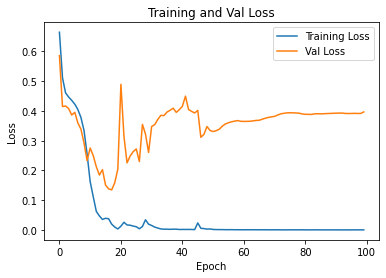

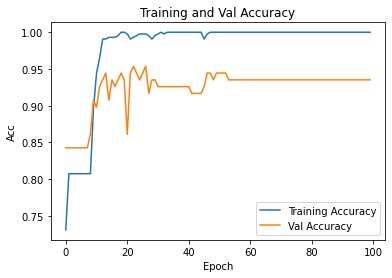

In [10]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Kuliner']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dsa_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [9]:
# SA
# Preprocess data
ts = ["Tempat nya bersih", "cafe enak murah", "wisata tutup hujan becek", "makanan enak"]
t=[0,1,0,1]
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(dsa['Ulasan'].astype(str))
X = tokenizer.texts_to_sequences(ts)
X = pad_sequences(X, maxlen=50, padding='post')

# Make predictions
predictions = model2.predict(X)
rounded_predictions = np.round(predictions).astype(int)

accuracy = accuracy_score(t, rounded_predictions)
report = classification_report(t, rounded_predictions)
cm = confusion_matrix(t, rounded_predictions)

print('Accuracy:', accuracy)
print(cm)
print(report)

Accuracy: 0.5
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
model2.save('sa_k_dt.h5')